# 1. Import the necessary libraries

In [106]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 2. Read the data as a data frame

In [107]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,no,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# 3a. Shape of the data

In [108]:
df.shape

(1338, 7)

# 3b. Data type of each attribute

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [110]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# 3c. Checking the presence of missing values

In [111]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [112]:
df.isnull().any().sum()

0

In [113]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


In [168]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [172]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# 3d. 5 point summary of numerical attributes

### 1. BMI is normally distributed with mean and median same
### 2. As age increases the charges increases
### 3. Most people has BMI of around 30
### 4. Over 40% of people have no kids
### 5. The charges is heavily right skewed and lot of outliers present


# 3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

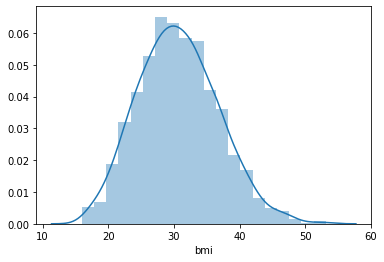

In [114]:
sns.distplot(df['bmi'], bins=20, kde=True, hist=True)

Text(0, 0.5, 'Frequency')

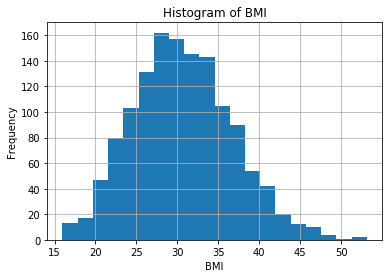

In [115]:
df.hist('bmi', bins=20)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

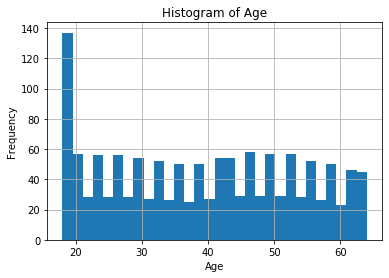

In [116]:
df.hist('age', bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

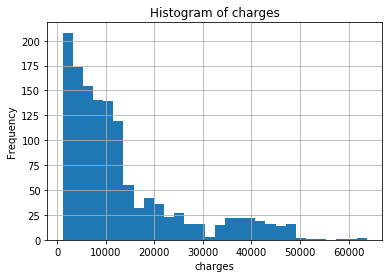

In [117]:
df.hist('charges', bins=30)
plt.title('Histogram of charges')
plt.xlabel('charges')
plt.ylabel('Frequency')

# 3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [118]:
df.skew(axis = 0, skipna = True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# 3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [119]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


### Outliers for bmi

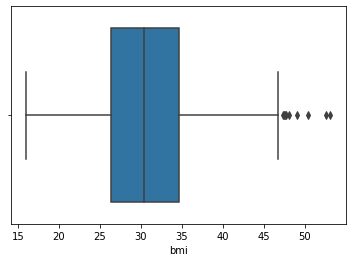

In [120]:
sns.boxplot(x=df['bmi'])

In [121]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Low_outliers = Q1 - 1.5 * IQR
high_outliers = Q3 + 1.5 * IQR
print(Low_outliers)
print(high_outliers)

26.29625
34.69375
8.3975
13.7
47.290000000000006


In [122]:
df[(df['bmi'] < Low_outliers) |  (df['bmi'] > high_outliers)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


### Outliers for age

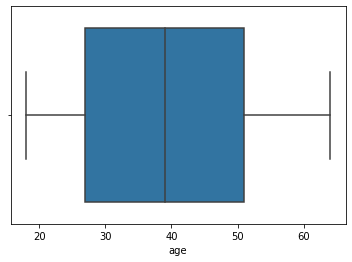

In [123]:
sns.boxplot(x=df['age'])

In [124]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Low_outliers = Q1 - 1.5 * IQR
high_outliers = Q3 + 1.5 * IQR
print(Low_outliers)
print(high_outliers)

27.0
51.0
24.0
-9.0
87.0


In [125]:
df[(df['age'] < Low_outliers) |  (df['age'] > high_outliers)]

,age,sex,bmi,children,smoker,region,charges


### Outliers for charges

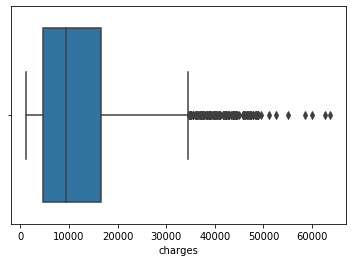

In [126]:
sns.boxplot(x=df['charges'])

In [127]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Low_outliers = Q1 - 1.5 * IQR
high_outliers = Q3 + 1.5 * IQR
print(Low_outliers)
print(high_outliers)

4740.28715
16639.912515
11899.625365
-13109.1508975
34489.350562499996


In [128]:
df[(df['charges'] < Low_outliers) |  (df['charges'] > high_outliers)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100
49,36,male,35.200,1,yes,southeast,38709.17600
53,36,male,34.430,0,yes,southeast,37742.57570


# 3h. Distribution of categorical columns (includechildren)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


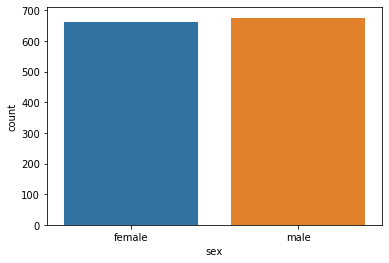

In [130]:
sns.countplot(x='sex', data=df)

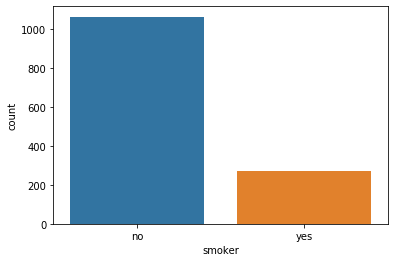

In [131]:
sns.countplot(x='smoker', data=df)

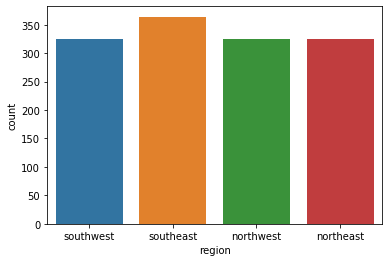

In [132]:
sns.countplot(x='region', data=df)

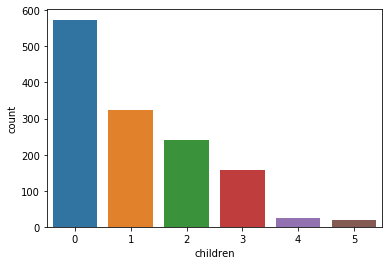

In [133]:
sns.countplot(x='children', data=df)

# 3i. Pair plot that includes all the columns of the dataframe

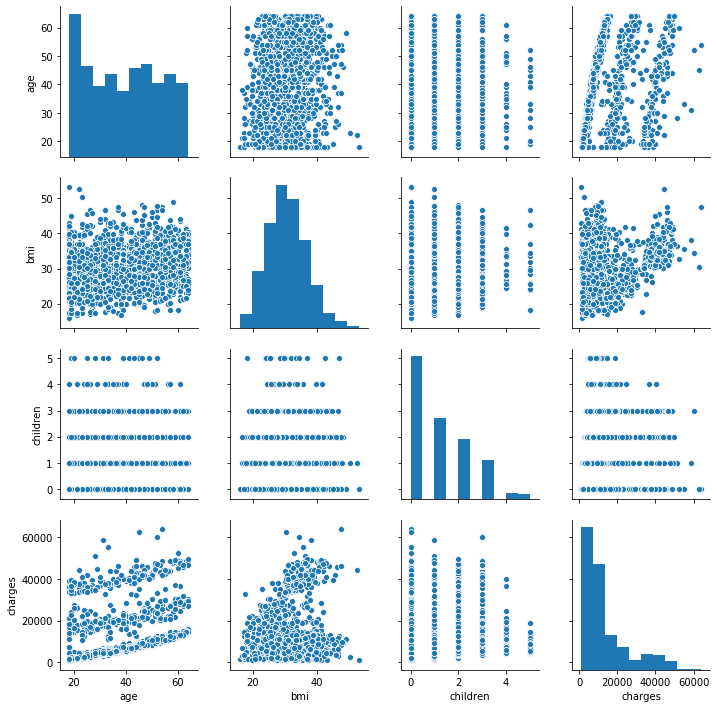

In [134]:
sns.pairplot(df)

# 4a Do charges of people who smoke differ significantly from the people who don't?

In [135]:
df_1 = df.copy(deep=True)

#if smoker replace with 1
#if non-smoker replace with 0
df_1['smoker'].replace(to_replace =["yes"] ,value ="1",inplace=True)
df_1['smoker'].replace(to_replace =["no"] ,value ="0",inplace=True)

df_1['smoker'] = df_1['smoker'].apply(pd.to_numeric) 
df_1['charges'] = df_1['charges'].apply(pd.to_numeric)


In [136]:
df_1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [137]:
df_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,0,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


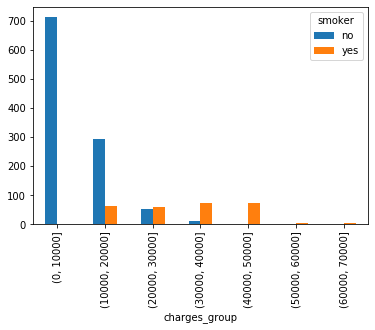

In [138]:
df_1.dtypes
df_1['charges_group'] = pd.cut(x=df_1['charges'],bins=[0,10000,20000,30000,40000,50000,60000,70000])
pd.crosstab(df_1['charges_group'],df['smoker']).plot(kind='bar')

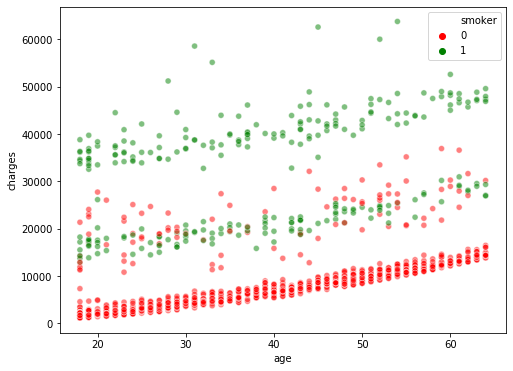

In [139]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_1.age, df_1.charges,hue=df_1.smoker,palette= ['red','green'] ,alpha=0.5)
               
plt.show()

In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,no,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [154]:
#H0= charges for smoker and non smoker are same
#H1= charges for smoker and non smoker are different

smoker=np.array(df[df.smoker=='yes'].charges)
non_smoker=np.array(df[df.smoker=='no'].charges)

t_statistic, p_value  =  stats.ttest_ind(smoker,non_smoker)

print(t_statistic)
print(p_value)
if p_value > 0.05 :
    print('charges for smoker and non smoker are same')
else :
    print('charges for smoker and non smoker are different',p_value)

46.74555712951678
1.9771861447569135e-283
charges for smoker and non smoker are different 1.9771861447569135e-283


# Observations

### Looking the distribution we can deduce that charges for smoker  is more than non-smokers
### if non smoker the charges are less and if smoker the charges are more

# 4b. Does bmi of males differ significantly from that of females?

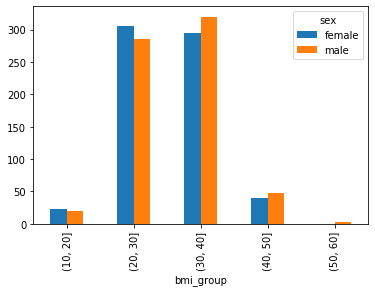

In [142]:
df.dtypes
df['bmi_group'] = pd.cut(x=df['bmi'],bins=[0,10,20,30,40,50,60])
pd.crosstab(df['bmi_group'],df['sex']).plot(kind='bar')

In [155]:
#H0= bmi of males and females are same
#H1= bmi of males and females are different

bmm=df[df.sex=='male']
bm1=bmm['bmi']
bmf=df[df.sex=='female']
bm2=bmf['bmi']
t_statistic,p_value=stats.ttest_ind(bm1,bm2)

print(t_statistic)
print(p_value)
if p_value > 0.05:
    print('bmi of males and females are same',p_value)
else :
    print('bmi of males and females are different',p_value)

1.696752635752224
0.08997637178984932
bmi of males and females are same 0.08997637178984932


## Observations

### BMI of males and females are almost same

# 4c. Is the proportion of smokers significantly different in different genders?

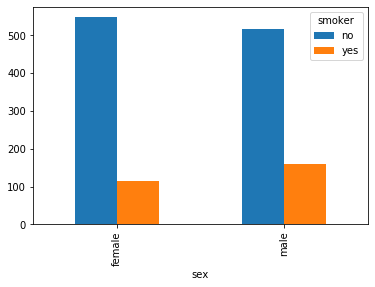

In [144]:
pd.crosstab(df['sex'],df['smoker']).plot(kind='bar')

In [156]:
# Chi_square test to check if smoking habits are different for different genders
# Ho = "Gender has no effect on smoking habits"   #  Null Hypothesis
# Ha = "Gender has an effect on smoking habits"   # Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

# Setting our significance level at 5%

print(chi)
print(p_value)
print(expected)

if p_value > 0.05:
    print('Gender has no effect on smoking habits',p_value)
else :
    print('Gender has an effect on smoking habits',p_value)

7.791011197332634
0.005250680038082373
[[526.92825112 135.07174888]
 [538.07174888 137.92825112]]
Gender has an effect on smoking habits 0.005250680038082373


## Observations
###  Since P-value is greater than significance level we can say gender has effect on smoking habits

# 4d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [175]:
x=df[df['sex']=='female']

no_child=x[x['children']==0]
one_child=x[x['children']==1]
two_child=x[x['children']==2]

print(no_child['bmi'].mean())
print(one_child['bmi'].mean())
print(two_child['bmi'].mean())

30.36152249134948
30.0526582278481
30.64978991596638


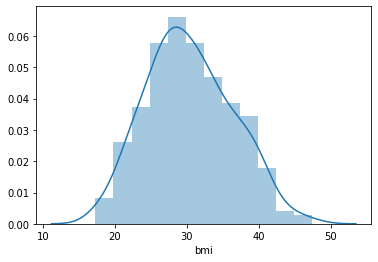

In [147]:
sns.distplot(no_child['bmi'])

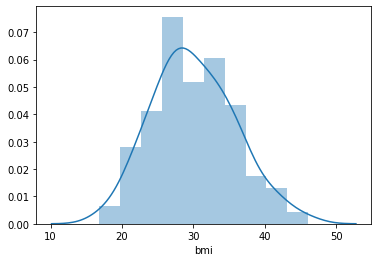

In [148]:
sns.distplot(one_child['bmi'])

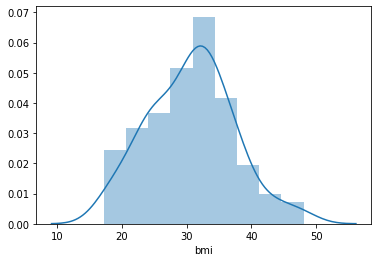

In [149]:
sns.distplot(two_child['bmi'])

## Observation
### irrespective of the no.of children the distribution of BMI is same across women

In [178]:
# Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
# Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis

female_df = df[df['sex']=='female']
female_df
zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)

print(f_stat)
print(p_value)

if p_value > 0.05:
    print('No. of children has no effect on bmi',p_value)
else :
    print('No. of children has an effect on bmi',p_value)

0.3344720147757968
0.7158579926754841
No. of children has no effect on bmi 0.7158579926754841
